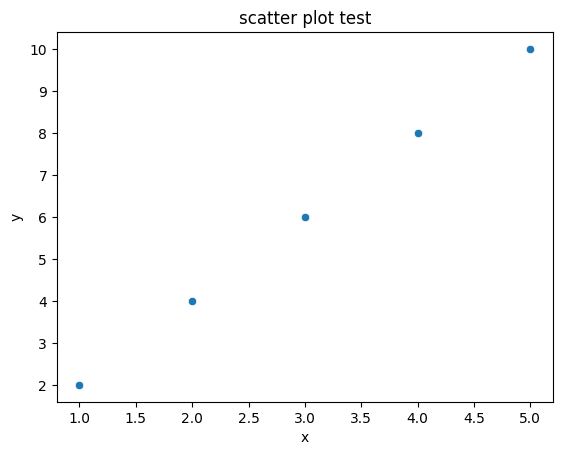

In [1]:
#seaborn

#creating plots like scatter plots, histograms, and box plots
#displaying distributions and relationships between variables

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#sample dataset
data = pd.DataFrame({'x': [1,2,3,4,5], 'y': [2,4,6,8,10]})

#create scatter plot 
sns.scatterplot(x='x', y='y', data=data)
plt.title("scatter plot test")
plt.show()

In [2]:
#numpy

import numpy as np

#example: create a numpy array and perform basic operations
arr = np.array([1,2,3,4,5])
print(np.mean(arr)) #mean of the array

3.0


In [ ]:
#pandas

import pandas as pd

#loading a csv file into a dataframe

df = pd.read_csv('data.csv')

#display first 5 rows
print(df.head())

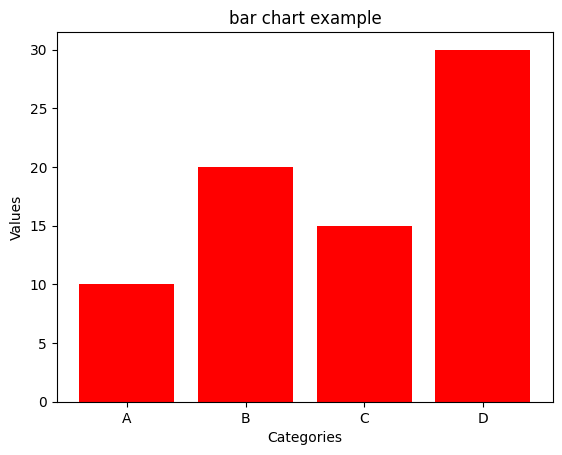

In [4]:
#matplotlib 

import matplotlib.pyplot as plt

categories = ["A","B","C","D"]
values = [10,20,15,30]

plt.bar(categories, values, color='red')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("bar chart example")
plt.show()

In [ ]:
#reading and writing data 
import pandas as pd

df = pd.read_csv("data.csv") #reading a csv file
df.to_csv("output.csv", index=False) #writing to a csv file
print(df.head())    #display first few rows

In [ ]:
#handling missing values

#check for missing vals
print(df.isnull().sum())

#drop missing vals
df_cleaned = df.dropna()
print("dataset after dropping missing vals: ", df_cleaned.shape)

#handle missing vals
df['age'] = df['age'].fillna(df['age'].mean()) #fill age with mean
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0]) #fill embarked with mode

#convert deck to string and replace NaN
df['deck'] = df['deck'].astype(str).fillna('Unknown')

#drop remaining NaN vals if needed
df = df.dropna()
print(df.isnull().sum()) #confirm no missing vals

In [ ]:
#encoding categorical data
#Machine learning models require numerical data, so we must convert categorical variables.
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

#label encoding (for binary categories)
#converts categories into numbers (e.g. male -> 0, female -> 1)

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender']) #0 for male, 1 for female
print(df['gender'].head())

#One-Hot Encoding (For Multi-Class Categories)
#Creates separate binary columns for each category.

df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
print(df.head())

#data visualization 
#creating histogram of numerical features
df[['age', 'fare']].hist(bins=20, figsize=(8,4))
plt.show()

In [ ]:
#Train-Test Split & Cross Validation

#the train-test split technique used in machine learning to evaluate the performance of a model
#involves splitting the dataset into two subsets

## training set: used to train the model
## testing set: used to evaluate the model's performace on unseen data

# this helps in assesing how well the model generalizes to new data and prevents issues like overfitting

#underfitting: model is too simple, performs poorly on training & test data
#overfitting: model memorizes training data but performs poorly on unseen data

#solution: use train-test split and cross-validation to check generalization

#diff ways to split data:
#80-20 split (common):
## 80% TRAINING - 20% TESTING
## used in general ML problems

#70-30 split:
## more test data, useful when we need better validation

#60-20-20 split:
## 60% TRAINING - 20% VALIDATION - 20% TESTING
## used for hyperparameter tuning to avoid overfitting


In [6]:
#train-test split, with the Naïve Bayes Classifier:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

#generate dummy dataset
X = np.random.rand(100, 5) #100 samples, 5 features
Y = np.random.randint(0, 2, 100) #binary target variable (0 or 1)

#splitting the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#create a naive bayes model
model = GaussianNB()

#train the model on training data
model.fit(X_train, Y_train)

#predict on test data
Y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"model accuracy: {accuracy:.2f}")

model accuracy: 0.55


In [8]:
#K-fold cross validation 

#K-fold cross validation divides the dataset into K equal parts (folds)
#model is trained K times, 
# each time using K-1 folds for training
# 1 fold for validation

#avg performance across all K folds is used as the final evaluation metric 

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns

#load dataset
df = sns.load_dataset("titanic")

#select features and target, handling missing values
X = df[['age', 'fare']].fillna(df[['age', 'fare']].mean())
Y = df['survived']

#convert to dataframe to use .iloc[]
X = pd.DataFrame(X)
Y = pd.Series(Y)

#define k-folds (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#initialize the model 
model = LogisticRegression()

#store the accuracy scores
accuracy_scores = []

#perform K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #now X is a Dataframe
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index] #now Y is a series
    
    #train model 
    model.fit(X_train, Y_train)
    
    #predict and evaluate
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(acc)


#print avg accuracy
print(f"k-fold avg accuracy: {np.mean(accuracy_scores):.4f}")

k-fold avg accuracy: 0.6498


In [9]:
#Leave-One-Out Cross Validation (LOOCV)

#extreme case of K-fold where K = total num of samples
#model is trained on all data except one sample & the process repeats for each sample

from sklearn.model_selection import LeaveOneOut

#initialize LOOCV
loo = LeaveOneOut()

#store accuracy scores
loo_scores = []

#perform LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    #train the model
    model.fit(X_train, Y_train)
    
    #predict and evaluate
    Y_pred = model.predict(X_test)
    loo_scores.append(accuracy_score(Y_test, Y_pred))
    
print(f"LOOCV avg accuracy: {np.mean(loo_scores):.4f}")

LOOCV avg accuracy: 0.6566


In [ ]:
#performance evaluation metrics

# commonly used evaluation metrics in machine learning:
# ● Accuracy
# ● Precision
# ● Recall
# ● R2 Score
# ● ROC AUC Curve

#for classification:
# accuracy score
# f1score
# precision 
# recall 
# ROC_AUC Score 
# Balanced Accuracy Score
# confusion matrix

#for regression: 
# Mean Absolute Error 
# Mean Square Error 
# Max Error 
# R2 Score 
# Explained Variance Score 
# D2 Absolute Score

In [ ]:
#CONFUSION MATRIX

# True Positive (TP): The number of times our model correctly predicts positive values.
# You predicted a positive value, and it is actually positive.
# ● False Positive (FP): The number of times our model wrongly predicts positive values when they are actually negative.
# You predicted a positive value, but it is actually negative.
# ● True Negative (TN): The number of times our model correctly predicts negative values.
# You predicted a negative value, and it is actually negative.
# ● False Negative (FN): The number of times our model wrongly predicts negative values when they are actually positive.
# You predicted a negative value, but it is actually positive.

In [ ]:
#ROC Curve - Receiver Operating Characteristic

#common used tool for evaluating performance of binary classification algos

# An ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) for a binary classifier at different classification thresholds.
# The TPR is the proportion of true positives (correctly predicted positive cases) out of all actual positives, while the FPR is the 
# proportion of false positives (incorrectlypredicted positive cases) out of all actual Negatives.

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming the model has been trained and 'PredictionDT' holds class predictions
# To compute ROC, we need the probability estimates, not just the predicted class.
# For binary classification, use the probabilities of the positive class.

#get probabilities for the positive class
probabilities = DT.predict_proba(X_test)[:, 1] #get probability for class '1'

#calculate ROC curve 
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

#calculate ROC_AUC score
roc_auc = roc_auc_score (Y_test, probabilities)

#plot ROC curve with shaded area under the curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.4)
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Area')
plt.legend(loc='lower right')
plt.show()


In [13]:
#CLASSIFICATION

#SUPPORT VECTOR MACHINE (SVM)
#set of supervised learning algos used primarily for classification tasks (can also be used for regression)

#key idea: to find the optimal hyperplane that separates the classes w/ the largest margin, thus improving generalization
#goal is to maximize the margin between the classes

#linear SVM:
# For linearly separable data, SVM finds the hyperplane that perfectly
# separates the classes. This is the simplest case, and the model does not require any additional tricks.

#non-linear SVM:
# SVM uses a kernel function to map the data into a higher-dimensional feature space, 
# where a linear decision boundary can be found.

#popular kernel functions:
## linear kernel: K(x, x’) = x^T x’
## polynomial kernel: K(x, x’) = (x^T x' + c)^d
## radial basis function (RBF) kernel: K(x, x’) = e^(−γ||x−x'||^2)

# The kernel trick allows SVM to find a non-linear decision boundary in the original
# feature space without explicitly calculating the transformation.

from sklearn import datasets
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#load dataset 
iris = datasets.load_iris()
X = iris.data

y = iris.target
y = (y==0).astype(int) #convert binary classification problem

#split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#train SVM model with RBF kernel
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

#make predictions
y_pred = svm.predict(X_test)

#evaluate model 
print("SVM Accuracy: ", accuracy_score(y_test, y_pred))


SVM Accuracy:  1.0


In [19]:
#REGRESSION 

#linear regression
#used for predictive analysis in machine learning.

# Linear regression shows the linear relationship between the independent(predictor) variable i.e. X-axis and the
# dependent(output) variable i.e. Y-axis, called linear regression. If there is a single input
# variable X (independent variable), such linear regression is called simple linear regression.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create & train the linear regression model
LR = LinearRegression()
ModelLR = LR.fit(X_train, y_train)

#predict on the test data
PredictionLR = ModelLR.predict(X_test)

#print predictions
print("predictions: ", PredictionLR)

predictions:  [ 0.06858754  1.00867146 -0.44710026  0.11520442  0.06738308  0.9268164
  0.30149058  0.03285725 -0.05930489  0.19989713  0.05860855  0.83360058
  1.01238455  0.84301552  1.02396928  0.1851498  -0.15568455  0.14419308
  0.08710758 -0.16992588  0.83271001  0.04251129  0.88704775 -0.16397104
  0.00190482 -0.02397524 -0.25389267 -0.11680648  0.82169091  0.81105763]


In [ ]:
# Root Mean Squared Error: The Root Mean Squared Error is the square root of the
# variance of the residuals. It specifies the absolute fit of the model to the data i.e. how
# close the observed data points are to the predicted values.

from sklearn.metrics import r2_score
print('===================LR Testing Accuracy================')
teachLR = r2_score(y_test, PredictionLR)
testingAccLR = teachLR * 100
print(testingAccLR)

In [20]:
#DECISION TREE CLASSIFIER
#most powerful and popular tool for classification and prediction.

# DECISION TREE TERMINOLOGIES
# 1. Root Node: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets
# 2. Splitting: It is a process of dividing a node into two or more sub-nodes
# 3. Decision Node: This node decides whether/when a sub-node splits into further sub-nodes or not
# 4. Leaf Node: Terminal Node that predicts the outcome (categorical or continuous value).
# 5. Branch: A subsection of the entire tree is called branch or sub-tree.
# 6. Parent Node: A node divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

#STEPS TO IMPLEMENT DECISION TREE

## step 1 -> begin the tree w/ root node, says S, which contains the complete dataset
## step 2 -> find best attribute in the dataset using ASM (attribute selection measure)
## step 3 -> divide the S into subsets that contain possible values for the best attribute
## step 4 -> generate the decision tree node containing the best attribute
## step 5 -> recursively make new decision trees using the subsets of the dataset created in step3

## continue this process until a stage is reached - cannot further classify the node and call the final node a leaf node

from sklearn.tree import DecisionTreeClassifier

#initialize the DecisionTreeClassifier
DT = DecisionTreeClassifier()



#train the model 
ModelDT = DT.fit(X_train, Y_train)

#model testing (prediction) 
PredictionDT = DT.predict(X_test)
print("predictions: ", PredictionDT)

#model training accuracy
print('====================DT Training Accuracy===============')
tracDT = DT.score(X_train, Y_train) #score method gives accuracy directly
TrainingAccDT = tracDT * 100
print(f"Training Accuracy: {TrainingAccDT:.2f}%")


#model testing accuracy
print('====================DT Training Accuracy===============')
teacDT = accuracy_score(Y_test, PredictionDT)
testingAccDT = teacDT * 100
print(f"Testing Accuracy: {testingAccDT:.2f}%")

ValueError: Number of labels=890 does not match number of samples=120